In [1]:
import time
from datetime import datetime
import vectorbt as vbt
from tqdm import tqdm

import pandas as pd
import pandas_ta as ta
import numpy as np
import mplfinance as mpf

from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('USDJPY_1h.csv')
data.tail()

,timestamp,open,high,low,close,adj close,volumn
4984,2022-08-30 13:00:00+01:00,138.197998,138.501007,138.160004,138.492996,138.492996,0
4985,2022-08-30 14:00:00+01:00,138.490997,138.561005,138.139999,138.386002,138.386002,0
4986,2022-08-30 15:00:00+01:00,138.382996,139.080002,138.360001,138.886002,138.886002,0
4987,2022-08-30 16:00:00+01:00,138.884995,138.955994,138.580002,138.727997,138.727997,0
4988,2022-08-30 17:00:00+01:00,138.725998,138.772995,138.619995,138.690994,138.690994,0


In [3]:
df = data.copy()
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True).dt.tz_localize(None)
df.set_index('timestamp', inplace = True)
df

,open,high,low,close,adj close,volumn
timestamp,,,,,,
2021-11-04 17:00:00,113.750000,113.750999,113.620003,113.680000,113.680000,0
2021-11-04 18:00:00,113.680000,113.740997,113.639999,113.738998,113.738998,0
2021-11-04 19:00:00,113.737000,113.787003,113.669998,113.702003,113.702003,0
2021-11-04 20:00:00,113.700996,113.779999,113.680000,113.746002,113.746002,0
2021-11-04 21:00:00,113.733002,113.769997,113.692001,113.740997,113.740997,0
...,...,...,...,...,...,...
2022-08-30 12:00:00,138.197998,138.501007,138.160004,138.492996,138.492996,0
2022-08-30 13:00:00,138.490997,138.561005,138.139999,138.386002,138.386002,0
2022-08-30 14:00:00,138.382996,139.080002,138.360001,138.886002,138.886002,0


In [4]:
def is_far_from_level(value, levels, df):    
  ave =  np.mean(df['high'] - df['low'])    
  return np.sum([abs(value-level)<ave for _,level,_ in levels])==0

In [5]:
def find_support_resistance(df):
  levels = []
  max_list = []
  min_list = []
  for i in range(5, len(df)-5):
      high_range = df['high'][i-5:i+4]
      current_max = high_range.max()
      if current_max not in max_list:
          max_list = []
      max_list.append(current_max)
      if len(max_list) == 5 and is_far_from_level(current_max, levels, df):
          levels.append((high_range.idxmax(), current_max, 'resistance'))
      
      low_range = df['low'][i-5:i+5]
      current_min = low_range.min()
      if current_min not in min_list:
          min_list = []
      min_list.append(current_min)
      if len(min_list) == 5 and is_far_from_level(current_min, levels, df):
          levels.append((low_range.idxmin(), current_min, 'support'))
  return levels

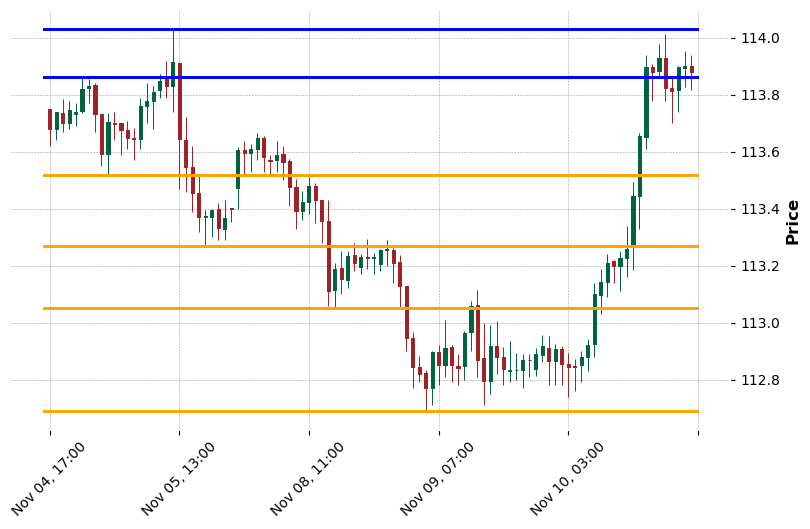

In [31]:
start, end = 0, 100
df_plot = df.iloc[start:end]
supp_resist = find_support_resistance(df_plot)

supp_resist_plots = []
supp_resist_colors = []

for line in supp_resist:

     supp_resist_line = np.empty(df_plot.shape[0])
     supp_resist_line.fill(line[1])
     color_plot = 'orange' if line[2] == 'support' else 'blue'

     supp_resist_plots.append(line[1])
     supp_resist_colors.append(color_plot)

mpf.plot(df.iloc[start:end], type='candle', style='charles',
     hlines=dict(hlines=supp_resist_plots,colors=supp_resist_colors,linestyle='-'),
     figsize=(10, 6))